# Predicting Heart Failure
## Machine Learning with Logistic Regression

### Import Modules

In [211]:
import pandas as pd
import numpy as np
import plotly.express as px
%matplotlib widget
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, f1_score, accuracy_score)
import pyarrow
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from pandas.api.types import CategoricalDtype
import warnings
import seaborn as sn
plt.style.use('dark_background')
sn.set_style('darkgrid')
#warnings.filterwarnings("ignore")

### Load Data and Perform EDA

In [162]:
raw_df = pd.read_csv('data/heart_disease_health_indicators_BRFSS2015.csv')


In [163]:
raw_df.head(15)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,1.0,1.0,1.0,1.0,30.0,1.0,0.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


In [164]:
raw_df.shape

(253680, 22)

In [165]:
raw_df.isna().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [166]:
heartattack_counts = raw_df['HeartDiseaseorAttack'].value_counts()
rename_labels = {
    0: 'No Heart Disease',
    1: 'Heart Disease'}
fig = px.pie(values=heartattack_counts,
             names=heartattack_counts.index.map(rename_labels),
             title='Distribution of Heart Diagnosis',
             labels=rename_labels,
             hover_name=heartattack_counts.index.map(rename_labels))
fig.update_traces(textinfo='percent+label', text=heartattack_counts.index.map(rename_labels))
fig.show()

In [167]:
categories = ['HighBP', 'Smoker', 'Stroke', 'Diabetes', 'HvyAlcoholConsump']

rename_labels = {
    0: 'No',
    1: 'Yes'
}

for category in categories:
    category_counts = raw_df[category].value_counts()

    fig = px.pie(values=category_counts,
                 names=category_counts.index.map(rename_labels),
                 title=f'Distribution of {category}',
                 labels=rename_labels,
                 hover_name=category_counts.index.map(rename_labels))

    fig.update_traces(textinfo='percent+label', text=category_counts.index.map(rename_labels))
    fig.show()

### Creating Categorical Columns so encoding and decoding is easier later

In [168]:
binary_map1 = {0: 'No', 1: 'Yes'}
cols_to_map = ['HeartDiseaseorAttack', 'HighBP', 'HighChol','CholCheck','Smoker','Stroke',
               'PhysActivity', 'Fruits', 'Veggies','HvyAlcoholConsump', 'AnyHealthcare',
               'NoDocbcCost','DiffWalk']
raw_df[cols_to_map] = raw_df[cols_to_map].replace(binary_map1)
raw_df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,No,Yes,Yes,Yes,40.0,Yes,No,0.0,No,No,Yes,No,Yes,No,5.0,18.0,15.0,Yes,0.0,9.0,4.0,3.0
1,No,No,No,No,25.0,Yes,No,0.0,Yes,No,No,No,No,Yes,3.0,0.0,0.0,No,0.0,7.0,6.0,1.0
2,No,Yes,Yes,Yes,28.0,No,No,0.0,No,Yes,No,No,Yes,Yes,5.0,30.0,30.0,Yes,0.0,9.0,4.0,8.0
3,No,Yes,No,Yes,27.0,No,No,0.0,Yes,Yes,Yes,No,Yes,No,2.0,0.0,0.0,No,0.0,11.0,3.0,6.0
4,No,Yes,Yes,Yes,24.0,No,No,0.0,Yes,Yes,Yes,No,Yes,No,2.0,3.0,0.0,No,0.0,11.0,5.0,4.0


In [169]:
binary_map2 = {0: 'Female', 1: 'Male'}
raw_df['Sex'] = raw_df['Sex'].replace(binary_map2)
raw_df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,No,Yes,Yes,Yes,40.0,Yes,No,0.0,No,No,Yes,No,Yes,No,5.0,18.0,15.0,Yes,Female,9.0,4.0,3.0
1,No,No,No,No,25.0,Yes,No,0.0,Yes,No,No,No,No,Yes,3.0,0.0,0.0,No,Female,7.0,6.0,1.0
2,No,Yes,Yes,Yes,28.0,No,No,0.0,No,Yes,No,No,Yes,Yes,5.0,30.0,30.0,Yes,Female,9.0,4.0,8.0
3,No,Yes,No,Yes,27.0,No,No,0.0,Yes,Yes,Yes,No,Yes,No,2.0,0.0,0.0,No,Female,11.0,3.0,6.0
4,No,Yes,Yes,Yes,24.0,No,No,0.0,Yes,Yes,Yes,No,Yes,No,2.0,3.0,0.0,No,Female,11.0,5.0,4.0


In [170]:
binary_map3 = {0: 'No', 1: 'Type1', 2: 'Type2'}
raw_df['Diabetes'] = raw_df['Diabetes'].replace(binary_map3)
raw_df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,No,Yes,Yes,Yes,40.0,Yes,No,No,No,No,Yes,No,Yes,No,5.0,18.0,15.0,Yes,Female,9.0,4.0,3.0
1,No,No,No,No,25.0,Yes,No,No,Yes,No,No,No,No,Yes,3.0,0.0,0.0,No,Female,7.0,6.0,1.0
2,No,Yes,Yes,Yes,28.0,No,No,No,No,Yes,No,No,Yes,Yes,5.0,30.0,30.0,Yes,Female,9.0,4.0,8.0
3,No,Yes,No,Yes,27.0,No,No,No,Yes,Yes,Yes,No,Yes,No,2.0,0.0,0.0,No,Female,11.0,3.0,6.0
4,No,Yes,Yes,Yes,24.0,No,No,No,Yes,Yes,Yes,No,Yes,No,2.0,3.0,0.0,No,Female,11.0,5.0,4.0


In [171]:
raw_df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

### Creating Training, Testing, and Validation Sets

In [172]:
train_val_df, test_df = train_test_split(raw_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (152208, 22)
val_df.shape : (50736, 22)
test_df.shape : (50736, 22)


In [173]:
train_df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
132776,No,No,No,Yes,25.0,Yes,No,Type2,Yes,Yes,Yes,No,Yes,No,2.0,0.0,1.0,No,Female,8.0,5.0,8.0
60629,No,No,No,Yes,25.0,No,No,No,Yes,Yes,Yes,No,Yes,No,2.0,0.0,0.0,No,Female,9.0,6.0,7.0
163859,No,No,No,Yes,28.0,Yes,No,No,Yes,Yes,Yes,Yes,Yes,No,2.0,0.0,0.0,No,Female,7.0,6.0,8.0
179387,No,No,No,Yes,31.0,No,No,No,Yes,Yes,Yes,No,Yes,No,2.0,0.0,0.0,No,Male,8.0,6.0,8.0
6258,No,No,No,Yes,21.0,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,2.0,0.0,2.0,No,Female,2.0,4.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153576,No,No,Yes,Yes,24.0,No,No,No,No,Yes,Yes,No,Yes,No,2.0,0.0,2.0,No,Female,4.0,6.0,8.0
187540,No,No,No,Yes,27.0,No,No,No,No,Yes,No,No,No,No,3.0,0.0,0.0,No,Female,2.0,4.0,6.0
158320,No,No,No,Yes,23.0,Yes,No,No,Yes,Yes,Yes,No,Yes,No,2.0,0.0,0.0,No,Male,6.0,6.0,8.0
185003,No,Yes,No,Yes,32.0,Yes,No,No,Yes,Yes,Yes,No,Yes,No,3.0,0.0,0.0,Yes,Male,9.0,6.0,8.0


In [174]:
val_df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
177961,No,Yes,Yes,Yes,28.0,No,No,No,No,Yes,Yes,No,Yes,No,2.0,0.0,2.0,No,Male,10.0,4.0,5.0
105626,Yes,Yes,Yes,Yes,27.0,Yes,Yes,Type2,No,Yes,Yes,No,Yes,No,4.0,8.0,20.0,Yes,Female,10.0,4.0,2.0
136759,No,No,Yes,Yes,47.0,No,No,No,Yes,Yes,No,No,Yes,No,3.0,3.0,0.0,Yes,Male,5.0,6.0,5.0
181637,No,Yes,No,Yes,26.0,No,No,No,Yes,Yes,Yes,No,Yes,No,1.0,0.0,0.0,No,Male,6.0,6.0,8.0
245214,No,No,No,Yes,23.0,No,No,No,Yes,Yes,Yes,No,Yes,No,2.0,0.0,0.0,Yes,Male,8.0,6.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250516,No,Yes,No,Yes,29.0,No,No,No,Yes,Yes,Yes,No,Yes,No,2.0,0.0,3.0,No,Male,8.0,6.0,7.0
161301,No,Yes,Yes,Yes,22.0,No,No,Type2,Yes,Yes,Yes,No,Yes,No,2.0,2.0,2.0,No,Female,9.0,5.0,1.0
31718,No,No,No,Yes,24.0,No,No,No,Yes,Yes,Yes,No,Yes,No,2.0,0.0,1.0,No,Female,8.0,6.0,7.0
152320,No,No,Yes,Yes,26.0,Yes,No,No,No,Yes,Yes,No,Yes,No,1.0,2.0,0.0,No,Female,9.0,5.0,7.0


In [175]:
test_df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
219620,No,No,No,Yes,21.0,No,No,No,No,Yes,Yes,No,Yes,No,3.0,3.0,7.0,No,Female,7.0,4.0,2.0
132821,No,Yes,Yes,Yes,28.0,No,No,No,Yes,Yes,Yes,No,Yes,No,3.0,0.0,0.0,No,Female,13.0,6.0,6.0
151862,No,No,No,Yes,24.0,No,No,No,Yes,Yes,Yes,No,Yes,No,1.0,0.0,0.0,No,Male,1.0,4.0,7.0
139717,No,No,No,Yes,27.0,Yes,No,No,Yes,No,Yes,Yes,Yes,No,2.0,3.0,0.0,No,Male,2.0,4.0,7.0
239235,No,No,Yes,Yes,31.0,Yes,No,No,No,Yes,Yes,No,Yes,Yes,4.0,27.0,27.0,Yes,Female,8.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169513,No,Yes,No,Yes,29.0,Yes,No,Type2,Yes,Yes,Yes,No,Yes,No,3.0,0.0,10.0,No,Female,9.0,6.0,7.0
182415,No,No,No,Yes,25.0,No,No,No,Yes,Yes,Yes,No,Yes,No,2.0,1.0,10.0,No,Female,10.0,5.0,8.0
109739,No,No,Yes,Yes,28.0,No,No,No,Yes,Yes,Yes,No,Yes,No,3.0,3.0,0.0,No,Male,6.0,6.0,8.0
181671,No,No,No,Yes,24.0,Yes,No,No,No,No,Yes,No,Yes,Yes,4.0,0.0,0.0,No,Male,13.0,4.0,5.0


### Identifying Features and Targets

In [176]:
input_cols = list(train_df.columns)[1:]
target_col = 'HeartDiseaseorAttack'
print(input_cols)
target_col

['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


'HeartDiseaseorAttack'

### Copying Inputs and Targets for Further Processing

In [177]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()
train_inputs

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
132776,No,No,Yes,25.0,Yes,No,Type2,Yes,Yes,Yes,No,Yes,No,2.0,0.0,1.0,No,Female,8.0,5.0,8.0
60629,No,No,Yes,25.0,No,No,No,Yes,Yes,Yes,No,Yes,No,2.0,0.0,0.0,No,Female,9.0,6.0,7.0
163859,No,No,Yes,28.0,Yes,No,No,Yes,Yes,Yes,Yes,Yes,No,2.0,0.0,0.0,No,Female,7.0,6.0,8.0
179387,No,No,Yes,31.0,No,No,No,Yes,Yes,Yes,No,Yes,No,2.0,0.0,0.0,No,Male,8.0,6.0,8.0
6258,No,No,Yes,21.0,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,2.0,0.0,2.0,No,Female,2.0,4.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153576,No,Yes,Yes,24.0,No,No,No,No,Yes,Yes,No,Yes,No,2.0,0.0,2.0,No,Female,4.0,6.0,8.0
187540,No,No,Yes,27.0,No,No,No,No,Yes,No,No,No,No,3.0,0.0,0.0,No,Female,2.0,4.0,6.0
158320,No,No,Yes,23.0,Yes,No,No,Yes,Yes,Yes,No,Yes,No,2.0,0.0,0.0,No,Male,6.0,6.0,8.0
185003,Yes,No,Yes,32.0,Yes,No,No,Yes,Yes,Yes,No,Yes,No,3.0,0.0,0.0,Yes,Male,9.0,6.0,8.0


In [178]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()
train_inputs[numeric_cols].describe()

,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income
count,152208.000000,152208.000000,152208.000000,152208.000000,152208.000000,152208.000000,152208.000000
mean,28.379566,2.511471,3.192598,4.238266,8.030688,5.050891,6.058847
std,6.614460,1.067363,7.421910,8.703617,3.052620,0.987088,2.069661
min,12.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,24.000000,2.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,27.000000,2.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,31.000000,3.000000,2.000000,3.000000,10.000000,6.000000,8.000000
max,98.000000,5.000000,30.000000,30.000000,13.000000,6.000000,8.000000


### Checking if Feature Scaling is Necessary

In [179]:
raw_df[numeric_cols].describe()

,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,28.382364,2.511392,3.184772,4.242081,8.032119,5.050434,6.053875
std,6.608694,1.068477,7.412847,8.717951,3.054220,0.985774,2.071148
min,12.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,24.000000,2.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,27.000000,2.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,31.000000,3.000000,2.000000,3.000000,10.000000,6.000000,8.000000
max,98.000000,5.000000,30.000000,30.000000,13.000000,6.000000,8.000000


Scaling numeric features to smaller ranges

In [180]:
scaler = MinMaxScaler()

In [181]:
scaler.fit(raw_df[numeric_cols])

MinMaxScaler()

Inspecting min and max values for each column

In [182]:
print('Minimum:')
list(scaler.data_min_)

Minimum:


[12.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0]

In [183]:
print('Maximum:')
list(scaler.data_max_)

Maximum:


[98.0, 5.0, 30.0, 30.0, 13.0, 6.0, 8.0]

### Scaling the Train, Test and Val sets with scaler.transform

In [184]:
train_inputs.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth',
       'DiffWalk', 'Sex', 'Age', 'Education', 'Income'],
      dtype='object')

In [185]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])
train_inputs[numeric_cols].describe()

,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income
count,152208.000000,152208.000000,152208.000000,152208.000000,152208.000000,152208.000000,152208.000000
mean,0.190460,0.377868,0.106420,0.141276,0.585891,0.810178,0.722692
std,0.076912,0.266841,0.247397,0.290121,0.254385,0.197418,0.295666
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.139535,0.250000,0.000000,0.000000,0.416667,0.600000,0.571429
50%,0.174419,0.250000,0.000000,0.000000,0.583333,0.800000,0.857143
75%,0.220930,0.500000,0.066667,0.100000,0.750000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [186]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (152208, 21)
train_targets: (152208,)
val_inputs: (50736, 21)
val_targets: (50736,)
test_inputs: (50736, 21)
test_targets: (50736,)


### Encoding Categorical Data

In [187]:
raw_df[categorical_cols].nunique()

HighBP               2
HighChol             2
CholCheck            2
Smoker               2
Stroke               2
Diabetes             3
PhysActivity         2
Fruits               2
Veggies              2
HvyAlcoholConsump    2
AnyHealthcare        2
NoDocbcCost          2
DiffWalk             2
Sex                  2
dtype: int64

In [188]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [189]:
encoder.fit(raw_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [190]:
encoder.categories_

[array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Type1', 'Type2'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Female', 'Male'], dtype=object)]

In [191]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['HighBP_No', 'HighBP_Yes', 'HighChol_No', 'HighChol_Yes', 'CholCheck_No', 'CholCheck_Yes', 'Smoker_No', 'Smoker_Yes', 'Stroke_No', 'Stroke_Yes', 'Diabetes_No', 'Diabetes_Type1', 'Diabetes_Type2', 'PhysActivity_No', 'PhysActivity_Yes', 'Fruits_No', 'Fruits_Yes', 'Veggies_No', 'Veggies_Yes', 'HvyAlcoholConsump_No', 'HvyAlcoholConsump_Yes', 'AnyHealthcare_No', 'AnyHealthcare_Yes', 'NoDocbcCost_No', 'NoDocbcCost_Yes', 'DiffWalk_No', 'DiffWalk_Yes', 'Sex_Female', 'Sex_Male']


In [192]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [193]:
pd.set_option('display.max_columns', None)
test_inputs

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,HighBP_No,HighBP_Yes,HighChol_No,HighChol_Yes,CholCheck_No,CholCheck_Yes,Smoker_No,Smoker_Yes,Stroke_No,Stroke_Yes,Diabetes_No,Diabetes_Type1,Diabetes_Type2,PhysActivity_No,PhysActivity_Yes,Fruits_No,Fruits_Yes,Veggies_No,Veggies_Yes,HvyAlcoholConsump_No,HvyAlcoholConsump_Yes,AnyHealthcare_No,AnyHealthcare_Yes,NoDocbcCost_No,NoDocbcCost_Yes,DiffWalk_No,DiffWalk_Yes,Sex_Female,Sex_Male
219620,No,No,Yes,0.104651,No,No,No,No,Yes,Yes,No,Yes,No,0.50,0.100000,0.233333,No,Female,0.500000,0.6,0.142857,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
132821,Yes,Yes,Yes,0.186047,No,No,No,Yes,Yes,Yes,No,Yes,No,0.50,0.000000,0.000000,No,Female,1.000000,1.0,0.714286,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
151862,No,No,Yes,0.139535,No,No,No,Yes,Yes,Yes,No,Yes,No,0.00,0.000000,0.000000,No,Male,0.000000,0.6,0.857143,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
139717,No,No,Yes,0.174419,Yes,No,No,Yes,No,Yes,Yes,Yes,No,0.25,0.100000,0.000000,No,Male,0.083333,0.6,0.857143,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
239235,No,Yes,Yes,0.220930,Yes,No,No,No,Yes,Yes,No,Yes,Yes,0.75,0.900000,0.900000,Yes,Female,0.583333,0.4,0.142857,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169513,Yes,No,Yes,0.197674,Yes,No,Type2,Yes,Yes,Yes,No,Yes,No,0.50,0.000000,0.333333,No,Female,0.666667,1.0,0.857143,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
182415,No,No,Yes,0.151163,No,No,No,Yes,Yes,Yes,No,Yes,No,0.25,0.033333,0.333333,No,Female,0.750000,0.8,1.000000,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
109739,No,Yes,Yes,0.186047,No,No,No,Yes,Yes,Yes,No,Yes,No,0.50,0.100000,0.000000,No,Male,0.416667,1.0,1.000000,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
181671,No,No,Yes,0.139535,Yes,No,No,No,No,Yes,No,Yes,Yes,0.75,0.000000,0.000000,No,Male,1.000000,0.6,0.571429,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0


In [194]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (152208, 50)
train_targets: (152208,)
val_inputs: (50736, 50)
val_targets: (50736,)
test_inputs: (50736, 50)
test_targets: (50736,)


#Saving Processed Data As Parquet Files for Optimal Storage

In [195]:
%%time
train_inputs.to_parquet('data/train_inputs.parquet')
val_inputs.to_parquet('data/val_inputs.parquet')
test_inputs.to_parquet('data/test_inputs.parquet')

pd.DataFrame(train_targets).to_parquet('data/train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('data/val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('data/test_targets.parquet')

CPU times: total: 500 ms
Wall time: 1.33 s


In [196]:
%%time

train_inputs = pd.read_parquet('data/train_inputs.parquet')
val_inputs = pd.read_parquet('data/val_inputs.parquet')
test_inputs = pd.read_parquet('data/test_inputs.parquet')

train_targets = pd.read_parquet('data/train_targets.parquet')[target_col]
val_targets = pd.read_parquet('data/val_targets.parquet')[target_col]
test_targets = pd.read_parquet('data/test_targets.parquet')[target_col]

CPU times: total: 172 ms
Wall time: 264 ms


In [197]:
train_inputs

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,HighBP_No,HighBP_Yes,HighChol_No,HighChol_Yes,CholCheck_No,CholCheck_Yes,Smoker_No,Smoker_Yes,Stroke_No,Stroke_Yes,Diabetes_No,Diabetes_Type1,Diabetes_Type2,PhysActivity_No,PhysActivity_Yes,Fruits_No,Fruits_Yes,Veggies_No,Veggies_Yes,HvyAlcoholConsump_No,HvyAlcoholConsump_Yes,AnyHealthcare_No,AnyHealthcare_Yes,NoDocbcCost_No,NoDocbcCost_Yes,DiffWalk_No,DiffWalk_Yes,Sex_Female,Sex_Male
132776,No,No,Yes,0.151163,Yes,No,Type2,Yes,Yes,Yes,No,Yes,No,0.25,0.0,0.033333,No,Female,0.583333,0.8,1.000000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
60629,No,No,Yes,0.151163,No,No,No,Yes,Yes,Yes,No,Yes,No,0.25,0.0,0.000000,No,Female,0.666667,1.0,0.857143,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
163859,No,No,Yes,0.186047,Yes,No,No,Yes,Yes,Yes,Yes,Yes,No,0.25,0.0,0.000000,No,Female,0.500000,1.0,1.000000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
179387,No,No,Yes,0.220930,No,No,No,Yes,Yes,Yes,No,Yes,No,0.25,0.0,0.000000,No,Male,0.583333,1.0,1.000000,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
6258,No,No,Yes,0.104651,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,0.25,0.0,0.066667,No,Female,0.083333,0.6,0.714286,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153576,No,Yes,Yes,0.139535,No,No,No,No,Yes,Yes,No,Yes,No,0.25,0.0,0.066667,No,Female,0.250000,1.0,1.000000,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
187540,No,No,Yes,0.174419,No,No,No,No,Yes,No,No,No,No,0.50,0.0,0.000000,No,Female,0.083333,0.6,0.714286,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
158320,No,No,Yes,0.127907,Yes,No,No,Yes,Yes,Yes,No,Yes,No,0.25,0.0,0.000000,No,Male,0.416667,1.0,1.000000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
185003,Yes,No,Yes,0.232558,Yes,No,No,Yes,Yes,Yes,No,Yes,No,0.50,0.0,0.000000,Yes,Male,0.666667,1.0,1.000000,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0


In [198]:
val_inputs

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,HighBP_No,HighBP_Yes,HighChol_No,HighChol_Yes,CholCheck_No,CholCheck_Yes,Smoker_No,Smoker_Yes,Stroke_No,Stroke_Yes,Diabetes_No,Diabetes_Type1,Diabetes_Type2,PhysActivity_No,PhysActivity_Yes,Fruits_No,Fruits_Yes,Veggies_No,Veggies_Yes,HvyAlcoholConsump_No,HvyAlcoholConsump_Yes,AnyHealthcare_No,AnyHealthcare_Yes,NoDocbcCost_No,NoDocbcCost_Yes,DiffWalk_No,DiffWalk_Yes,Sex_Female,Sex_Male
177961,Yes,Yes,Yes,0.186047,No,No,No,No,Yes,Yes,No,Yes,No,0.25,0.000000,0.066667,No,Male,0.750000,0.6,0.571429,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
105626,Yes,Yes,Yes,0.174419,Yes,Yes,Type2,No,Yes,Yes,No,Yes,No,0.75,0.266667,0.666667,Yes,Female,0.750000,0.6,0.142857,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
136759,No,Yes,Yes,0.406977,No,No,No,Yes,Yes,No,No,Yes,No,0.50,0.100000,0.000000,Yes,Male,0.333333,1.0,0.571429,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
181637,Yes,No,Yes,0.162791,No,No,No,Yes,Yes,Yes,No,Yes,No,0.00,0.000000,0.000000,No,Male,0.416667,1.0,1.000000,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
245214,No,No,Yes,0.127907,No,No,No,Yes,Yes,Yes,No,Yes,No,0.25,0.000000,0.000000,Yes,Male,0.583333,1.0,0.857143,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250516,Yes,No,Yes,0.197674,No,No,No,Yes,Yes,Yes,No,Yes,No,0.25,0.000000,0.100000,No,Male,0.583333,1.0,0.857143,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
161301,Yes,Yes,Yes,0.116279,No,No,Type2,Yes,Yes,Yes,No,Yes,No,0.25,0.066667,0.066667,No,Female,0.666667,0.8,0.000000,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
31718,No,No,Yes,0.139535,No,No,No,Yes,Yes,Yes,No,Yes,No,0.25,0.000000,0.033333,No,Female,0.583333,1.0,0.857143,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
152320,No,Yes,Yes,0.162791,Yes,No,No,No,Yes,Yes,No,Yes,No,0.00,0.066667,0.000000,No,Female,0.666667,0.8,0.857143,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


### Training the Regression Model

In [199]:
model = LogisticRegression(solver='liblinear')

In [200]:
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

LogisticRegression(solver='liblinear')

In [201]:
print(numeric_cols + encoded_cols)

['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income', 'HighBP_No', 'HighBP_Yes', 'HighChol_No', 'HighChol_Yes', 'CholCheck_No', 'CholCheck_Yes', 'Smoker_No', 'Smoker_Yes', 'Stroke_No', 'Stroke_Yes', 'Diabetes_No', 'Diabetes_Type1', 'Diabetes_Type2', 'PhysActivity_No', 'PhysActivity_Yes', 'Fruits_No', 'Fruits_Yes', 'Veggies_No', 'Veggies_Yes', 'HvyAlcoholConsump_No', 'HvyAlcoholConsump_Yes', 'AnyHealthcare_No', 'AnyHealthcare_Yes', 'NoDocbcCost_No', 'NoDocbcCost_Yes', 'DiffWalk_No', 'DiffWalk_Yes', 'Sex_Female', 'Sex_Male']


In [203]:
#higher weights the greater impact on predictions
print(model.coef_.tolist())

[[0.0862300462265062, 1.979782610689385, 0.06702703073454874, 0.015482091215616892, 3.0637033739973125, 0.08336965016615408, -0.3295308740106033, -0.5845616951658722, -0.05167218522504941, -0.6113249767994736, -0.02490890359258076, -0.5184870995317823, -0.11774678086138769, -0.49834124701847093, -0.13789263337499608, -0.8056162831559368, 0.16938240276564498, -0.3311066530769057, -0.2914303433346001, -0.013696883981233261, -0.34537557106600436, -0.2908583093296005, -0.31727232062003635, -0.31896155977325047, -0.3490232215790508, -0.28721065881150515, -0.14739454837663668, -0.4888393320146517, -0.30859598748904193, -0.3276378929037047, -0.4424628561107052, -0.19377102427711415, -0.46475874228293224, -0.17147513811031576, -0.6828285647833818, 0.04659468438988943]]


In [204]:
print(model.intercept_)

[-0.63623388]


### Make Predictions on Training Test Set

In [205]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [206]:
train_preds = model.predict(X_train)

In [207]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [208]:
train_targets

132776    No
60629     No
163859    No
179387    No
6258      No
          ..
153576    No
187540    No
158320    No
185003    No
72397     No
Name: HeartDiseaseorAttack, Length: 152208, dtype: object

In [209]:
#probablistic prediction with predict_proba
train_probs = model.predict_proba(X_train)
train_probs

array([[0.97888364, 0.02111636],
       [0.98516297, 0.01483703],
       [0.99126256, 0.00873744],
       ...,
       [0.98056047, 0.01943953],
       [0.86113478, 0.13886522],
       [0.89910899, 0.10089101]])

In [210]:
model.classes_

array(['No', 'Yes'], dtype=object)

In [220]:
acc = accuracy_score(train_targets, train_preds)
print("Accuracy: {:.2f}%".format(acc * 100))

Accuracy: 90.71%


This model receives a 90.71% Accuracy

In [215]:
confusion_matrix(train_targets, train_preds, normalize='true')

array([[0.98878214, 0.01121786],
       [0.87486103, 0.12513897]])

In [218]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)

    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sn.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));

    return preds

### Training Predictions

Accuracy: 90.71%


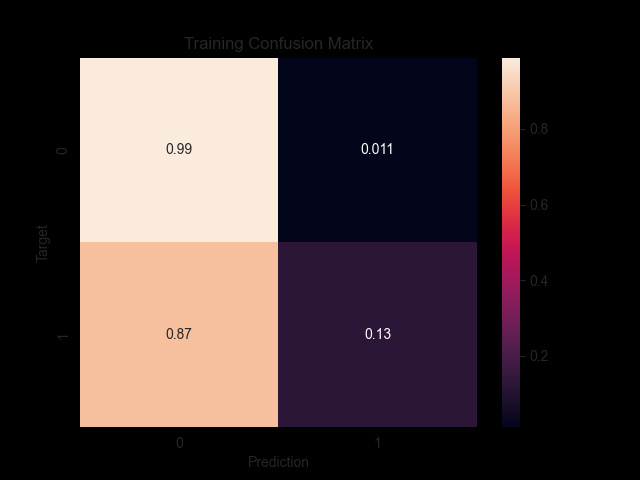

In [219]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

### Validations Predictions

Accuracy: 90.85%


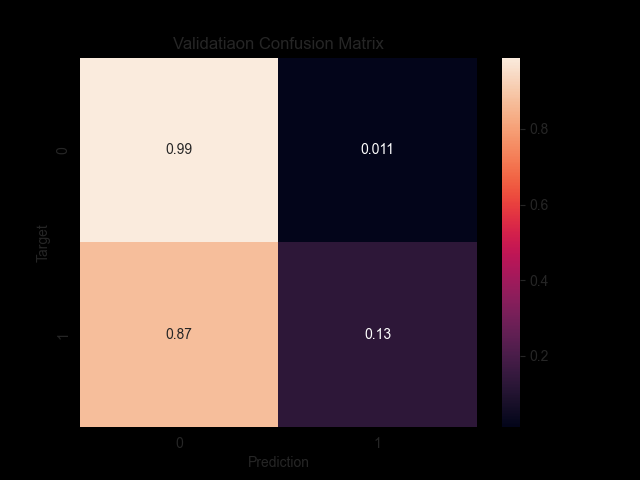

In [221]:
val_preds = predict_and_plot(X_val, val_targets, 'Validatiaon')

### Test Predictions

Accuracy: 90.83%


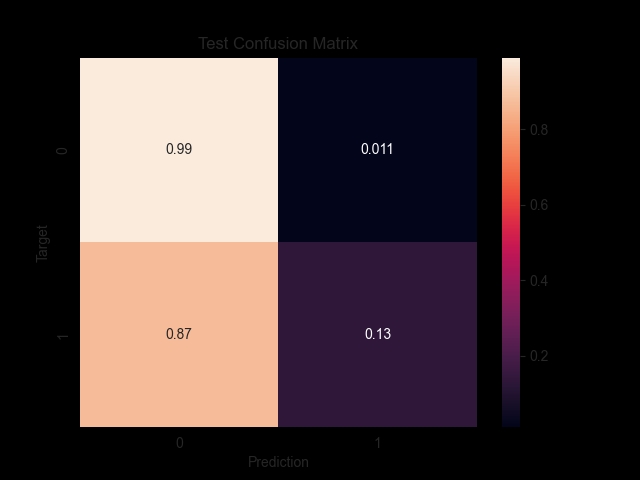

In [222]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')

The model performs slightly above 90% accuracy